In [1]:
import sys
sys.path.append("../")
import numpy as np
from gridworld import Gridworld


#Actions: up (0), down (1), left (2), right (3), do nothing (4)

human_policy = [3,3,3,3,1,\
                0,3,3,3,1,\
                0,1,3,3,1,\
                0,2,0,3,1,\
                0,2,3,3,0]


expert = []
for _ in range(10000):
    env = Gridworld()
    ep = []
    i = 0
    s = 0
    while i<50:
        a = human_policy[s]
        s,reward,done,_ = env.step(a)
        ep.append([s, a, reward])
        if done:
            break
        i+=1
    # print(i)
    ep = np.array(ep)
    expert.append(ep)
expert_np = np.array(expert)
np.save("expert_demo/expert_demo", expert_np)
print(expert_np.shape)

(10000,)


(25, 4)
(10000,)
0 episode score is -160.00
0 episode score is -160.00
50 episode score is -91.57
100 episode score is -72.97
150 episode score is -60.33
200 episode score is -52.09
250 episode score is -45.66
300 episode score is -40.07
350 episode score is -35.95
400 episode score is -32.69
450 episode score is -29.91
500 episode score is -27.43
550 episode score is -25.34
600 episode score is -23.18
650 episode score is -21.06
700 episode score is -19.51
750 episode score is -18.18
800 episode score is -17.25
850 episode score is -15.84
900 episode score is -14.76
950 episode score is -13.77
1000 episode score is -12.83
1050 episode score is -11.84
1100 episode score is -10.94
1150 episode score is -10.10
1200 episode score is -9.33
1250 episode score is -8.59
1300 episode score is -8.01
1350 episode score is -7.39
1400 episode score is -6.80
1450 episode score is -6.27
1500 episode score is -5.89
1550 episode score is -5.41
1600 episode score is -5.01
1650 episode score is -4.57
17

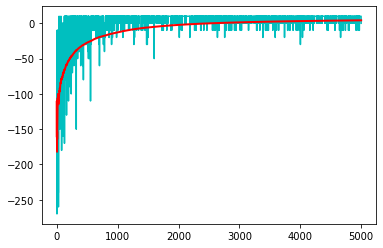

In [2]:
import gym
import pylab
import numpy as np
from gridworld import Gridworld
import matplotlib.pyplot as plt

from maxent import *

n_states = 25 
n_actions = 4
one_feature = 20 # number of state per one feature
q_table = np.zeros((n_states, n_actions)) # (400, 3)
print(q_table.shape)
feature_matrix = np.eye((n_states)) # (400, 400)

gamma = 1
q_learning_rate = 0.03
theta_learning_rate = 0.005

np.random.seed(1)

def idx_demo(env, one_feature):
    raw_demo = np.load(file="expert_demo/expert_demo.npy", allow_pickle = True)
    print(raw_demo.shape)
            
    return raw_demo

def idx_state(env, state):
    return state

def update_q_table(state, action, reward, next_state):
    q_1 = q_table[state][1]
    q_2 = reward + gamma * max(q_table[next_state])
    q_table[state][action] += q_learning_rate * (q_2 - q_1)

env = Gridworld()

demonstrations = idx_demo(env, one_feature)

expert = expert_feature_expectations(feature_matrix, demonstrations)
learner_feature_expectations = np.zeros(n_states)

theta = -(np.random.uniform(size=(n_states,)))

episodes, scores = [], []
avg = []

n = 5000
for episode in range(n+1):
    env.reset()
    state = 0
    score = 0


    if (episode != 0 and episode == 50) or (episode > 50 and episode % 50 == 0):
        learner = learner_feature_expectations / episode
        maxent_irl(expert, learner, theta, theta_learning_rate)
        

    while True:
        state_idx = idx_state(env, state)
        action = np.argmax(q_table[state_idx])
        next_state, reward, done, _ = env.step(action)

        irl_reward = get_reward(feature_matrix, theta, n_states, state_idx)
        next_state_idx = idx_state(env, next_state)
        update_q_table(state_idx, action, irl_reward, next_state_idx)

        learner_feature_expectations += feature_matrix[int(state_idx)]

        score += reward
        state = next_state

        if done:
            scores.append(score)
            episodes.append(episode)
            avg.append(np.mean(scores))
            break
            
    if episode%50==0:
        print('{} episode score is {:.2f}'.format(episode, np.mean(scores)))
        

    if episode % n == 0:
        score_avg = np.mean(scores)
        print('{} episode score is {:.2f}'.format(episode, score_avg))
        plt.plot(episodes, scores, "c")
        plt.plot(episodes, avg, "r", linewidth = 2)
        plt.savefig("./learning_curves/maxent_30000.png")
        np.save("./results/maxent_q_table", arr=q_table)

In [11]:
np.argmax(q_table, axis=1)

array([3, 3, 3, 3, 1, 0, 3, 3, 3, 1, 2, 0, 0, 2, 1, 0, 1, 0, 3, 1, 1, 3,
       3, 3, 0])

In [3]:
human_policy = [3,3,3,3,1,\
                0,3,3,3,1,\
                0,1,3,3,1,\
                0,2,0,3,1,\
                0,2,3,3,0]

sum(1 for i in range(25) if np.argmax(q_table, axis=1)[i]==human_policy[i])

18

10

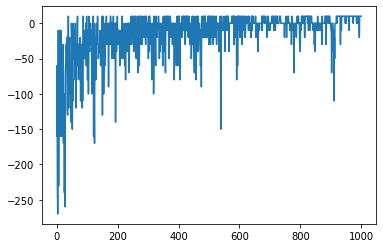

In [10]:
plt.plot(scores)
max(scores)